In [1]:
%matplotlib inline
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.visualization import *
from math import sqrt, pi
from qiskit_textbook.tools import array_to_latex

# Loading your IBM Q account(s)
provider = IBMQ.load_account()

## Secret Sharing between Two Parties - Alice and Bob

Lets build a circuit to represent the secret sharing scheme that we saw in the Quantum Cryptography lectures. Suppose that we allow the user to enter a 2 bit string (i.e one of 00, 01, 10, 11). Based on this we will define a Bell-state for a 2-qubit quantum circuit. 

In [2]:
## SETUP_BELL_STATE(QuantumCircuit, [0, 1, 2, 3])
## sets up the bell state w.r.t. the inputed secret.
def setup_bell_state(qc, secret) :
    qc.h(0)
    qc.cx(0, 1)
    
    # if secret == 0 : (do nothing)
    if secret == 1 :
        qc.z(1)
    elif secret == 2 :
        qc.x(1)
    elif secret == 3 :
        qc.x(1)
        qc.z(1)
    return qc

The circuit is setup below and the user can enter whatever secret they so desire as long as it is $$ 0 \leq s \leq 3 $$

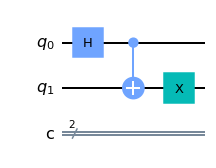

In [3]:
circ = QuantumCircuit(2, 2)
secret = 2 # CHANGE THIS IF YOU WANT A DIFFERENT BELL STATE
setup_bell_state(circ, secret)
circ.draw('mpl')

In [4]:
svSim = Aer.get_backend('statevector_simulator')
finalState = execute(circ, backend = svSim).result().get_statevector()
array_to_latex(finalState, pretext="\\text{Statevector = }")

<IPython.core.display.Math object>

You can verify from the above statevector that the function does in fact produce the correct Bell states.

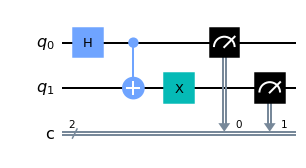

In [5]:
circ.measure([0, 1], [0, 1])
circ.draw("mpl")

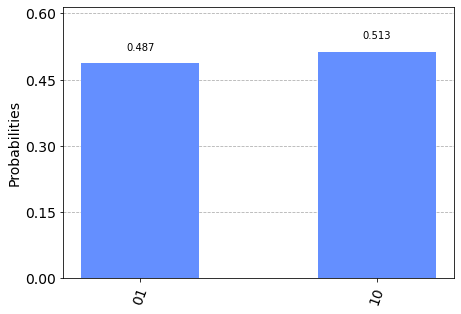

In [6]:
nativeSim = Aer.get_backend('qasm_simulator')
result = execute(circ, backend = nativeSim, shots = 1024).result()
plot_histogram(result.get_counts())

### Note that the QASM simulator and the counts only allow us to distinguish between States 1,2 & States 3,4.